# Lab 2 (Millican)

In [49]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Problem 1)
For my noise measurement I have decided that my noise value per day is averaged at 2 detected rays and the actual average number of gamma rays for one day is 4. These first two plots show what the distributions for the background noise (first) and actual collection (second) distributions look like. 

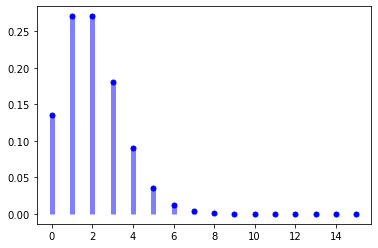

In [50]:
mu = 5; err_mu = 2; offset = 0
x = np.linspace(0, 15, 16)
err_y = stats.poisson.pmf(x, err_mu, offset)
plt.plot(x, stats.poisson.pmf(x, err_mu, offset), 'bo', lw=0, ms=5)
plt.vlines(x, 0, stats.poisson.pmf(x, err_mu, offset), colors='b', lw=5, alpha=0.5)

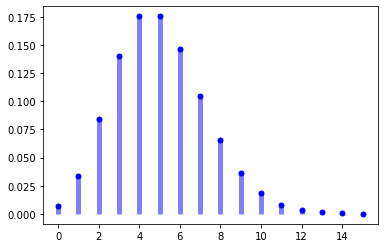

In [51]:
x = np.linspace(0, 15, 16)
err_y = stats.poisson.pmf(x, mu, offset)
plt.plot(x, stats.poisson.pmf(x, mu, offset), 'bo', lw=0, ms=5)
plt.vlines(x, 0, stats.poisson.pmf(x, mu, offset), colors='b', lw=5, alpha=0.5)

Now I will show how the convolutions change the distribution as you collect over multiple days. Here you can see that with larger amounts of convolutions (days of collection) the sum of the distribution begins to widen and have its peak at larger values, which is to be expected with more collection time, and the distribution average begins to narrow closer and closer to the provide average which is 2. 

Text(0, 0.5, 'Probability')

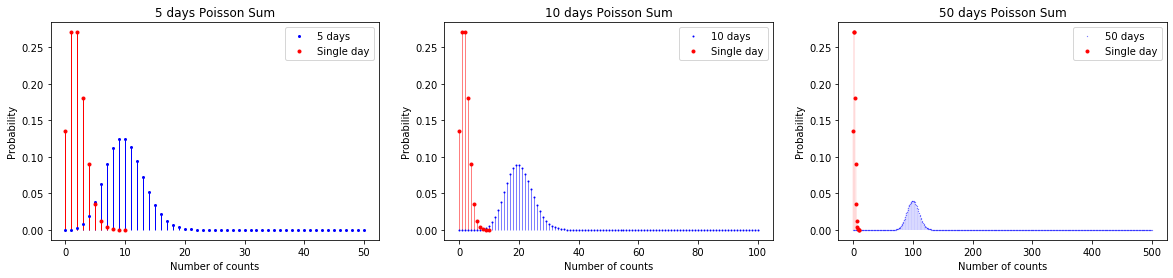

In [79]:
fig, (ax, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 4))
days = 5
x = np.linspace(0, 10, 11)
err_y = stats.poisson.pmf(x, err_mu, offset)
y = np.convolve(err_y, err_y)
for i in range (2, days):
    y = np.convolve(y, err_y)
new_x = np.linspace(0, 10*days, 10*days+1)
ax.plot(new_x,y, 'bo', lw=0, ms=10/days, label = f'{days} days')
ax.plot(x, err_y, 'ro', lw=0, ms=3, label = 'Single day')
ax.vlines(new_x, 0, y, colors='b', lw=5/days, alpha=1)
ax.vlines(x, 0, err_y, colors='r', lw=5/days, alpha=1)


days = 10
x = np.linspace(0, 10, 11)
err_y = stats.poisson.pmf(x, err_mu, offset)
y = np.convolve(err_y, err_y)
for i in range (2, days):
    y = np.convolve(y, err_y)
new_x = np.linspace(0, 10*days, 10*days+1)
ax2.plot(new_x, y, 'bo', lw=0, ms=10/days, label = f'{days} days')
ax2.plot(x, err_y, 'ro', lw=0, ms=3, label = 'Single day')
ax2.vlines(new_x, 0, y, colors='b', lw=5/days, alpha=1)
ax2.vlines(x, 0, err_y, colors='r', lw=5/days, alpha=1)


days = 50
x = np.linspace(0, 10, 11)
err_y = stats.poisson.pmf(x, err_mu, offset)
y = np.convolve(err_y, err_y)
for i in range (2, days):
    y = np.convolve(y, err_y)
new_x = np.linspace(0, 10*days, 10*days+1)
ax3.plot(new_x, y, 'bo', lw=0, ms=10/days, label = f'{days} days')
ax3.plot(x, err_y, 'ro', lw=1, ms=3, label = 'Single day')
ax3.vlines(new_x, 0, y, colors='b', lw=5/days, alpha=1)
ax3.vlines(x, 0, err_y, colors='r', lw=5/days, alpha=1)


ax.set_title('5 days Poisson Sum'); ax.legend() ; ax.set_xlabel('Number of counts'); ax.set_ylabel('Probability')
ax2.set_title('10 days Poisson Sum'); ax2.legend(); ax2.set_xlabel('Number of counts'); ax2.set_ylabel('Probability')
ax3.set_title('50 days Poisson Sum'); ax3.legend(); ax3.set_xlabel('Number of counts'); ax3.set_ylabel('Probability')

After 5 days of convolution, the distribution is still Poissonian. This is because the convolution essentially changes the experiment from a single day with an average of 2 hits to an experiment over 5 days with an average of 10, following the same statistics. 

Text(0, 0.5, 'Probability')

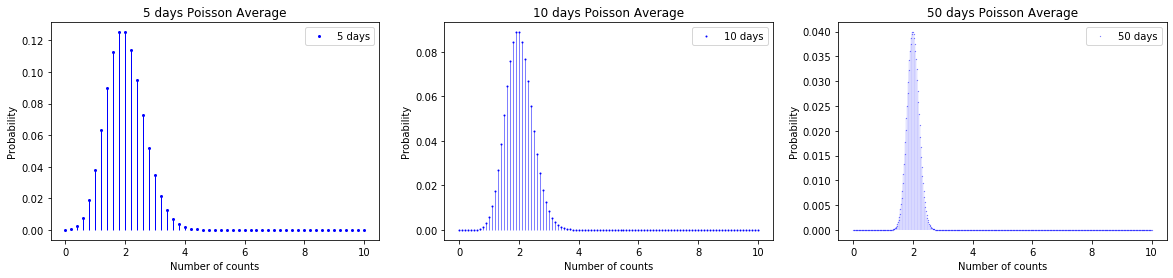

In [80]:
fig, (ax, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 4))
days = 5
x = np.linspace(0, 10, 11)
err_y = stats.poisson.pmf(x, err_mu, offset)
y = np.convolve(err_y, err_y)
for i in range (2, days):
    y = np.convolve(y, err_y)
new_x = np.linspace(0, 10*days, 10*days+1)/days
ax.plot(new_x, y, 'bo', lw=0, ms=10/days, label = f'{days} days')
#ax.plot(x, err_y, label = 'Single day')
ax.vlines(new_x, 0, y, colors='b', lw=5/days, alpha=1)
days = 10
x = np.linspace(0, 10, 11)
err_y = stats.poisson.pmf(x, err_mu, offset)
y = np.convolve(err_y, err_y)
for i in range (2, days):
    y = np.convolve(y, err_y)
new_x = np.linspace(0, 10*days, 10*days+1)/days
ax2.plot(new_x, y, 'bo', lw=0, ms=10/days, label = f'{days} days')
#ax2.plot(x, err_y, label = 'Single day')
ax2.vlines(new_x, 0, y, colors='b', lw=5/days, alpha=1)

days = 50
x = np.linspace(0, 10, 11)
err_y = stats.poisson.pmf(x, err_mu, offset)
y = np.convolve(err_y, err_y)
for i in range (2, days):
    y = np.convolve(y, err_y)
new_x = np.linspace(0, 10*days, 10*days+1)/days
ax3.plot(new_x, y, 'bo', lw=0, ms=10/days, label = f'{days} days')
#ax3.plot(x, err_y, 'bo', lw=0, ms=5, label = 'Single day')
ax3.vlines(new_x, 0, y, colors='b', lw=5/days, alpha=1)

ax.set_title('5 days Poisson Average'); ax.legend(); ax.set_xlabel('Number of counts'); ax.set_ylabel('Probability') 
ax2.set_title('10 days Poisson Average'); ax2.legend(); ax2.set_xlabel('Number of counts'); ax2.set_ylabel('Probability')
ax3.set_title('50 days Poisson Average'); ax3.legend(); ax3.set_xlabel('Number of counts'); ax3.set_ylabel('Probability')

The distribution of the average over mulitple days narrows with the larger number of convolutions. This makes sense as with more trials, the distribution will tend closer to the constant average rate as it is the most probable value each day. The Central Limit Theorem also confirms that with larger amounts of convolutions, the distribution will narrow and tend toward the actual average value of collection, also becoming more Gaussian in shape. 

Now I am going to find the $\sigma$ value of the background noise to the actual collection over 25 days. With a daily collection of 4 gamma rays, I should have seen roughly 100 gamma rays in this 25 day period, which is the value I will take the CDF function to, and then I will find the $\sigma$ value corresponding to that using the PPF function on a normal distribution.  

Percentage of hits that falsely appear as signal: 1.5697454447405335e-10 || sigma value for this percentage: 6.2917


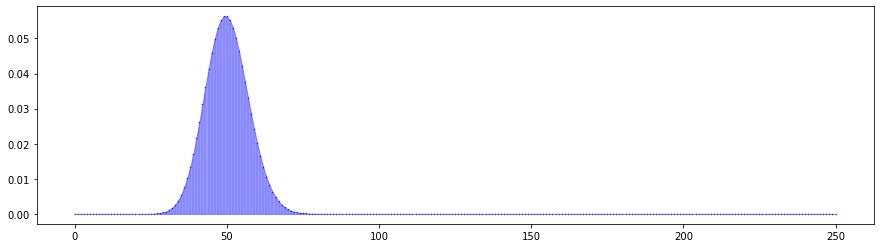

In [54]:
fig, (ax3) = plt.subplots(1, 1, figsize = (15, 4))
days = 25
x = np.linspace(0, 10, 11)
err_y = stats.poisson.pmf(x, err_mu, offset)
y = np.convolve(err_y, err_y)
for i in range (2, days):
    y = np.convolve(y, err_y)
new_x = np.linspace(0, 10*days, 10*days+1)
ax3.plot(new_x, y, 'bo', lw=0, ms=10/days, label = f'{days} days')
ax3.vlines(new_x, 0, y, colors='b', lw=5/days, alpha=1)
ax3.fill_between(new_x, stats.poisson.pmf(new_x, err_mu*days, offset), color = 'b', linewidth = 1, alpha = .4)
prob = 1 - stats.poisson.cdf(100, err_mu*days, offset)
z = (stats.norm.ppf(1-(prob)))
print(f'Percentage of hits that falsely appear as signal: {prob} || sigma value for this percentage: {z:.4f}')

I found that after 25 days the sigma value of my observation would be 6.4 $\sigma$. This is good becasue that means it would be very unlikely for the background to give this sort of signal. 

## Problem 2)
I have chosen to use an exponential distribution for my skewed continuous distribution. I will attempt to uncover at what number of convolutions does the distribution appear to become Gaussian. 

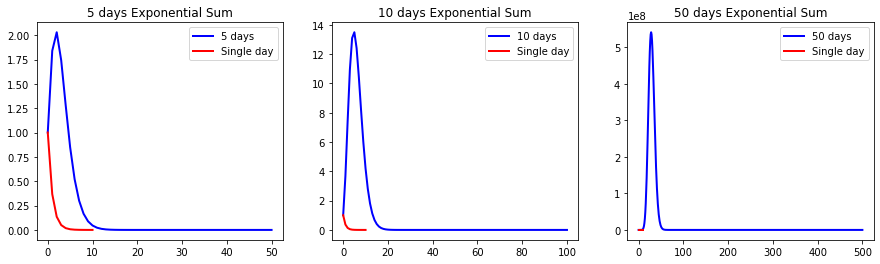

In [55]:
loc = 0; scale = 1
fig, (ax, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 4))
days = 5
x = np.linspace(0, 10, 11)
err_y = stats.expon.pdf(x, loc, scale)
y = np.convolve(err_y, err_y)
for i in range (2, days):
    y = np.convolve(y, err_y)
new_x = np.linspace(0, 10*days, 10*days+1)
ax.plot(new_x, y, 'b', lw=2, label = f'{days} days')
ax.plot(x, err_y, 'r', lw=2, label = 'Single day')

days = 10
x = np.linspace(0, 10, 11)
err_y = stats.expon.pdf(x, loc, scale)
y = np.convolve(err_y, err_y)
for i in range (2, days):
    y = np.convolve(y, err_y)
new_x = np.linspace(0, 10*days, 10*days+1)
ax2.plot(new_x, y, 'b', lw=2, label = f'{days} days')
ax2.plot(x, err_y, 'r', lw=2, label = 'Single day')

days = 50
x = np.linspace(0, 10, 11)
err_y = stats.expon.pdf(x, loc, scale)
y = np.convolve(err_y, err_y)
for i in range (2, days):
    y = np.convolve(y, err_y)
new_x = np.linspace(0, 10*days, 10*days+1)
ax3.plot(new_x, y, 'b', lw=2, label = f'{days} days')
ax3.plot(x, err_y, 'r', lw=2, label = 'Single day')

ax.set_title('5 days Exponential Sum'); ax.legend()
ax2.set_title('10 days Exponential Sum'); ax2.legend()
ax3.set_title('50 days Exponential Sum'); ax3.legend()

/opt/conda/lib/python3.7/site-packages/matplotlib/ticker.py:1123: RuntimeWarning: divide by zero encountered in double_scalars
  coeff = np.round(x / b ** exponent)


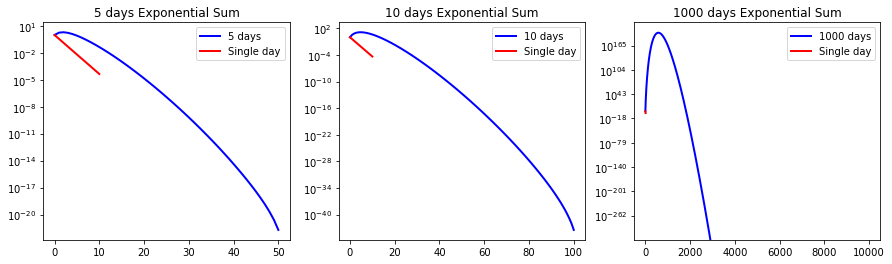

In [56]:
loc = 0; scale = 1
fig, (ax, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 4))
days = 5
x = np.linspace(0, 10, 11)
err_y = stats.expon.pdf(x, loc, scale)
y = np.convolve(err_y, err_y)
for i in range (2, days):
    y = np.convolve(y, err_y)
new_x = np.linspace(0, 10*days, 10*days+1)
ax.plot(new_x, y, 'b', lw=2, label = f'{days} days')
ax.plot(x, err_y, 'r', lw=2, label = 'Single day')

days = 10
x = np.linspace(0, 10, 11)
err_y = stats.expon.pdf(x, loc, scale)
y = np.convolve(err_y, err_y)
for i in range (2, days):
    y = np.convolve(y, err_y)
new_x = np.linspace(0, 10*days, 10*days+1)
ax2.plot(new_x, y, 'b', lw=2, label = f'{days} days')
ax2.plot(x, err_y, 'r', lw=2, label = 'Single day')

days = 1000
x = np.linspace(0, 10, 11)
err_y = stats.expon.pdf(x, loc, scale)
y = np.convolve(err_y, err_y)
for i in range (2, days):
    y = np.convolve(y, err_y)
new_x = np.linspace(0, 10*days, 10*days+1)
ax3.plot(new_x, y, 'b', lw=2, label = f'{days} days')
ax3.plot(x, err_y, 'r', lw=2, label = 'Single day')

ax.set_title('5 days Exponential Sum'); ax.legend(); ax.set_yscale('log')
ax2.set_title('10 days Exponential Sum'); ax2.legend(); ax2.set_yscale('log')
ax3.set_title('1000 days Exponential Sum'); ax3.legend(); ax3.set_yscale('log')

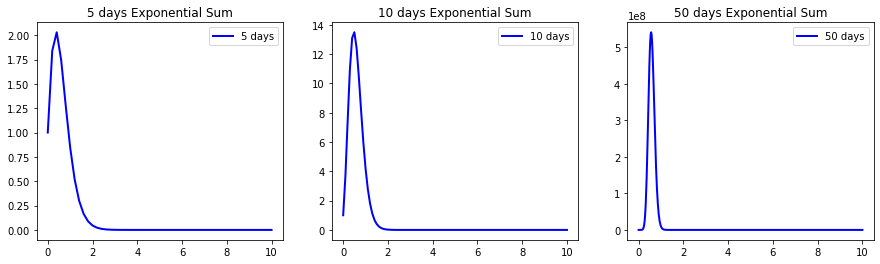

In [57]:
loc = 0; scale = 1
fig, (ax, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 4))
days = 5
x = np.linspace(0, 10, 11)
err_y = stats.expon.pdf(x, loc, scale)
y = np.convolve(err_y, err_y)
for i in range (2, days):
    y = np.convolve(y, err_y)
new_x = np.linspace(0, 10*days, 10*days+1)/days
ax.plot(new_x, y, 'b', lw=2, label = f'{days} days')
#ax.plot(x, err_y, 'r', lw=2, label = 'Single day')

days = 10
x = np.linspace(0, 10, 11)
err_y = stats.expon.pdf(x, loc, scale)
y = np.convolve(err_y, err_y)
for i in range (2, days):
    y = np.convolve(y, err_y)
new_x = np.linspace(0, 10*days, 10*days+1)/days
ax2.plot(new_x, y, 'b', lw=2, label = f'{days} days')
#ax2.plot(x, err_y, 'r', lw=2, label = 'Single day')

days = 50
x = np.linspace(0, 10, 11)
err_y = stats.expon.pdf(x, loc, scale)
y = np.convolve(err_y, err_y)
for i in range (2, days):
    y = np.convolve(y, err_y)
new_x = np.linspace(0, 10*days, 10*days+1)/days
ax3.plot(new_x, y, 'b', lw=2, label = f'{days} days')
#ax3.plot(x, err_y, 'r', lw=2, label = 'Single day')

ax.set_title('5 days Exponential Sum'); ax.legend()
ax2.set_title('10 days Exponential Sum'); ax2.legend()
ax3.set_title('50 days Exponential Sum'); ax3.legend()

/opt/conda/lib/python3.7/site-packages/matplotlib/ticker.py:1123: RuntimeWarning: divide by zero encountered in double_scalars
  coeff = np.round(x / b ** exponent)


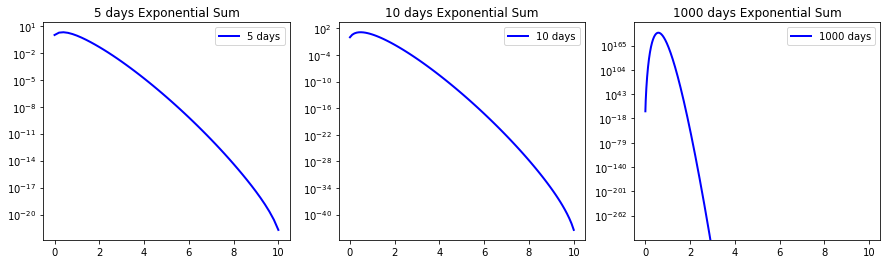

In [58]:
loc = 0; scale = 1
fig, (ax, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 4))
days = 5
x = np.linspace(0, 10, 11)
err_y = stats.expon.pdf(x, loc, scale)
y = np.convolve(err_y, err_y)
for i in range (2, days):
    y = np.convolve(y, err_y)
new_x = np.linspace(0, 10*days, 10*days+1)/days
ax.plot(new_x, y, 'b', lw=2, label = f'{days} days')
#ax.plot(x, err_y, 'r', lw=2, label = 'Single day')

days = 10
x = np.linspace(0, 10, 11)
err_y = stats.expon.pdf(x, loc, scale)
y = np.convolve(err_y, err_y)
for i in range (2, days):
    y = np.convolve(y, err_y)
new_x = np.linspace(0, 10*days, 10*days+1)/days
ax2.plot(new_x, y, 'b', lw=2, label = f'{days} days')
#ax2.plot(x, err_y, 'r', lw=2, label = 'Single day')

days = 1000
x = np.linspace(0, 10, 11)
err_y = stats.expon.pdf(x, loc, scale)
y = np.convolve(err_y, err_y)
for i in range (2, days):
    y = np.convolve(y, err_y)
new_x = np.linspace(0, 10*days, 10*days+1)/days
ax3.plot(new_x, y, 'b', lw=2, label = f'{days} days')
#ax3.plot(x, err_y, 'r', lw=2, label = 'Single day')

ax.set_title('5 days Exponential Sum'); ax.legend(); ax.set_yscale('log')
ax2.set_title('10 days Exponential Sum'); ax2.legend(); ax2.set_yscale('log')
ax3.set_title('1000 days Exponential Sum'); ax3.legend(); ax3.set_yscale('log')

After putting the exponential distrbution under many convolutions (days) the shape of both the Sum and Average do not stem away from being exponential very fast. I would say that at around 1000 convolutions you can start to see the body of the distribution looking more and more Gaussian (not including the tail). I plotted the graphs on a log base y-scale to see the shapes better and even after 1000 iterations they are not great Gaussian fits, but definitely more Gaussian than before. 

## Problem 3)
Here I will determine the validity of findings from a real world (but made up) distribution of data. The background signal has a width of 5. The single pixel that I have am referring to has a value of 17.6. 

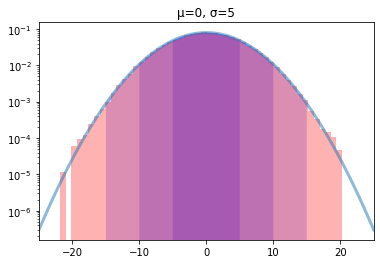

In [59]:
mu = 0; sigma = 5
d = stats.norm.rvs(loc = mu, scale = sigma, size = 100000)
fig, ax = plt.subplots(1, 1)
ax.set_title(f'\u03BC={mu}, \u03C3={sigma}')
ax.hist(d,50, density=True, color = 'r', alpha = .3)
ax.tick_params(labelsize = 10)
ax.set_xlim([mu-5*sigma,mu+5*sigma])
x = np.linspace(mu-5*sigma,mu+5*sigma,1000)
ax.plot(x,stats.norm.pdf(x,loc = mu, scale = sigma),linewidth = 3,alpha = 0.5)
int_base3 = np.linspace(mu-3*sigma,mu+3*sigma,1000)
int_base2 = np.linspace(mu-2*sigma,mu+2*sigma,1000)
int_base1 = np.linspace(mu-1*sigma,mu+1*sigma,1000)
ax.fill_between(int_base1, stats.norm.pdf(int_base1,loc = mu, scale = sigma), color = 'b', linewidth = 0, alpha = .2)
ax.fill_between(int_base2, stats.norm.pdf(int_base2,loc = mu, scale = sigma), color = 'b', linewidth = 0, alpha = .2)
ax.fill_between(int_base3, stats.norm.pdf(int_base3,loc = mu, scale = sigma), color = 'b', linewidth = 0, alpha = .2)
plt.yscale('log')


Looking at this representation it is hard to see that the value 8.4 is within the 5$\sigma$ range and therefore cannot be deamed as a discovery. I will go through the more rigorous and reliable way of determining the sigma value. 

In [71]:
mu = 0; sigma = 5
prob = (1 - stats.norm.cdf(17.6, mu, sigma))
z = (stats.norm.ppf(1-(prob)))
print(f'Percentage of hits that falsely appear as signal: {prob} || sigma value for this percentage: {z:.4f}')

Percentage of hits that falsely appear as signal: 0.0002157733992946831 || sigma value for this percentage: 3.5200


Now if I did not know which pixel exactly to look at, I would have to search over the entire 10k pixels to see if I detected anything. To best make use of the trials factor, I am going to do what was started in class. An easy way to get the distribution of the total 10k pixels is simply to mulitiply the probability distribution by the number of pixels. This is shown below. 

The best way to interpret the new question is: "Given that fact that we are looking at 10k pixels, what is the likelyhood of finding a value of <17.6> in any of the pixels only from the background distribution?" 

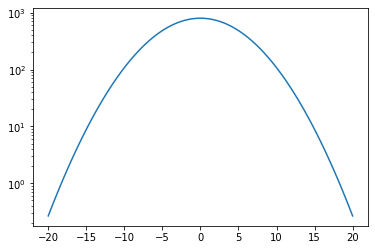

In [72]:
pixels = 10000; mu = 0; sigma = 5
x = np.linspace(-20, 20, 100)
err_y = stats.norm.pdf(x, mu, sigma)*pixels
fig, ax = plt.subplots(1, 1)
ax.plot(x, err_y)
ax.set_yscale('log')

In [81]:
mu = 0; sigma = 5
prob = (1 - stats.norm.cdf(17.6, mu, sigma))*pixels
z = (stats.norm.ppf(1-(prob)))
print(f'Expectation value for a value of this strength: {prob} ' ) 

Expectation value for a value of this strength: 2.157733992946831 


This percentage is impossible. But it does provide information on the significance of the detection. Because the value is greater than one so you know that this type of detection would be fairly probable. You would expect to see a signal of this strength around 2.16 times in a set of 10k pixels with the average per pixel descibed above. There is nothing significant about this deteciton. 

## Problem 4)


Now I am going to compare the difference between a 5$\sigma$ value from a single pixel detection vs. the 10k pixel sweep. This will show the difference is signal strength needed for a "significant" detection. I will first find the 5$\sigma$ value for the single pixel situation, then the 10k pixel situation, and then I will find the ratio between the two to understand the sensitivity penalty of this situation.

In [82]:
prob5sigma = 1/3.5e6
det1px = stats.norm.ppf(1 - prob5sigma, mu, sigma)
det1px

25.003157174651903

In [83]:
det10kpx = stats.norm.ppf(1 - prob5sigma/pixels, mu, sigma)
det10kpx
prob = (1 - stats.norm.cdf(det10kpx, mu, sigma)) * pixels
z = (stats.norm.ppf(1-(prob)))
print(f'Percentage of hits that falsely appear as signal: {prob} || z-value: {z}' ) 

Percentage of hits that falsely appear as signal: 2.857147851642594e-07 || z-value: 5.000631097900781


In [84]:
ratio = det10kpx / det1px 
print(f'The sensitivity penalty for this distribution is only {ratio}')

The sensitivity penalty for this distribution is only 1.3100398378275584


The sensitivity penalty of this distribution is surprisingly low, but when looking at the distributions of the two situations, you can begin to understand the reasoning. The tails of the Gaussian distributions are all fairly similar and very close to 0. For this reason, even when multiplying the distribution by the 10k pixels, the difference in the x-scale to reach the same probability when taking the .cdf() is not much changed even from the single pixel distribution. This is most easily seen when on the log base y-scale. 

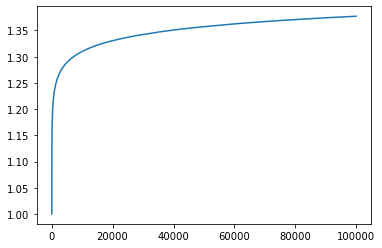

In [69]:
x = []; y = []
prob5sigma = 1/3.5e6
det1px = stats.norm.ppf(1 - prob5sigma, mu, sigma)
for i in range(1, 100000): 
    x.append(i)
    det10kpx = stats.norm.ppf(1 - prob5sigma/i, mu, sigma)
    y.append(det10kpx / det1px)
plt.plot(x,y)

Extra Credit Coming Soon

Ready to create Pull Request. 